# OLIVE TREE DISEASE CLASSIFICATION

### Introduction

In this project a dataset of 3400 olive leaf images collected from Denizli city of Turkey during spring and summer are given. Three classes of these images:

Leaf images infected with Aculus olearius.
Leaf images infected with Olive peacock spot.
Leaf images with healthy leaves.  

**Objective**

Load and prepare images for modeling.
Develop a convolutional neural network for image classification.
Develop a model for image classification using transfer learning.

### 1. SETUP & LOAD DATA

In [23]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from scipy.misc import face
from random import randint
from sklearn.datasets import fetch_openml
from PIL import Image
from skimage import io, img_as_float, img_as_ubyte
from skimage.io import imread, imshow
import cv2
import os
from glob import glob

In [32]:
dir = '/Users/raghadibrahim/Desktop/olive_disease_detection/dataset/'
healthy_dir = os.path.join(dir, 'healthy')
aculus_olearius_dir = os.path.join(dir, 'aculus_olearius')
peacock_disease_dir = os.path.join(dir, 'peacock_disease')

healthy_data = os.listdir(dir + 'healthy/')
aculus_olearius_data = os.listdir(dir + 'aculus_olearius/')
peacock_disease_data = os.listdir(dir + 'peacock_disease/')

---

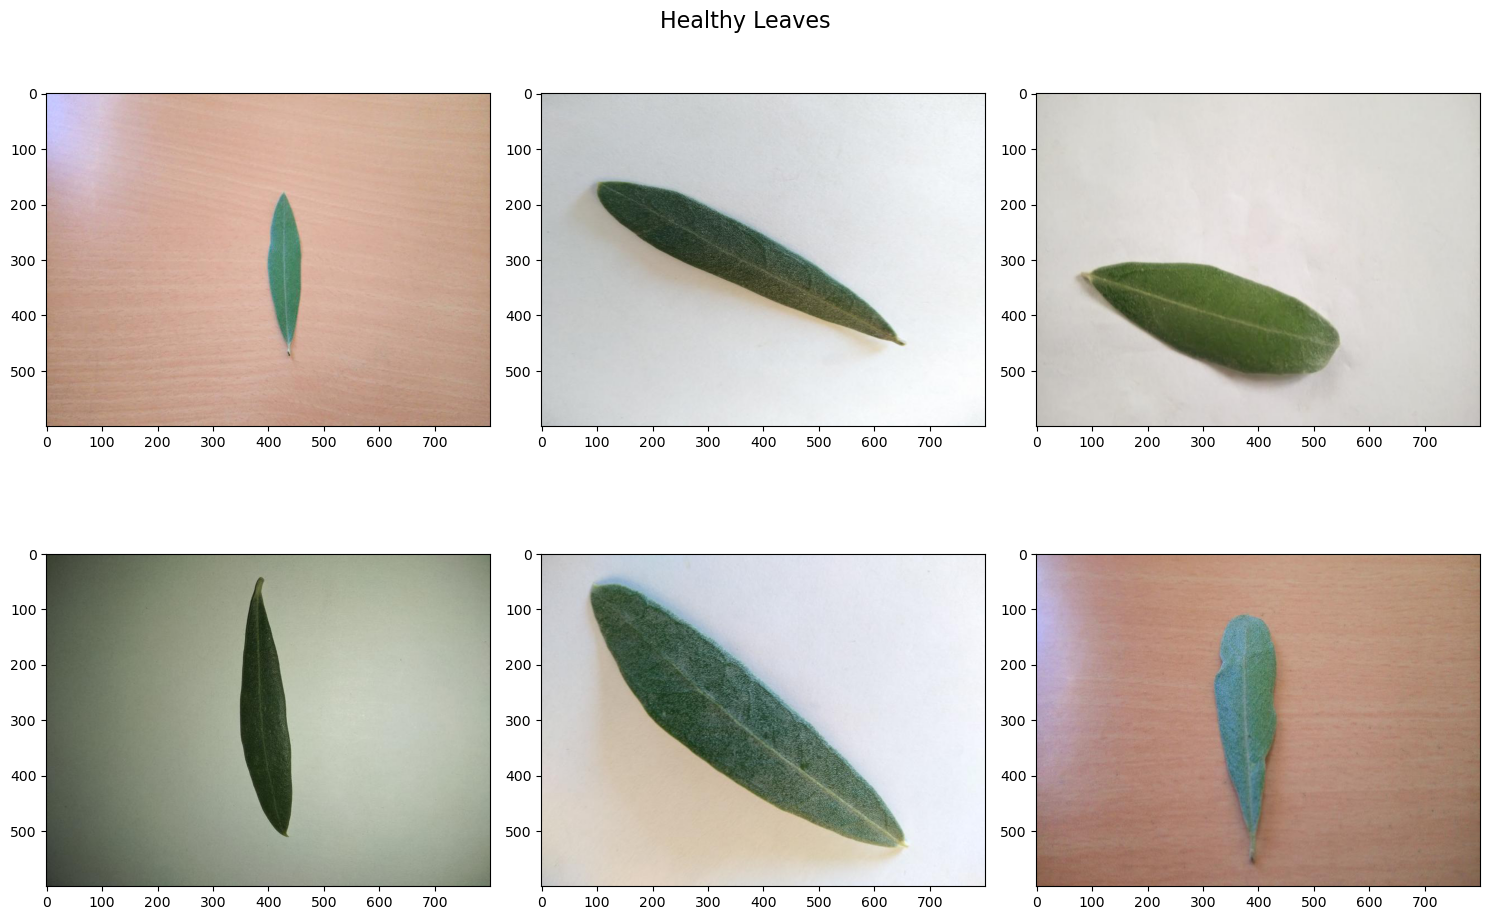

In [33]:
# Select 6 random images from your directory
healthy_sample = np.random.choice(healthy_data, 6, replace=False)

# Set up a subplot grid that is 2x3
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, ax in enumerate(axs.flatten()):
    if i < len(healthy_sample):
        # Read the image
        img_path = os.path.join(dir, 'healthy', healthy_sample[i])
        image = Image.open(img_path)
        num = np.asarray(image)

        
        # Plot the image
        ax.imshow(image)

plt.tight_layout()
fig.suptitle("Healthy Leaves", fontsize=16)  # Set title for the entire figure

#plt.title("Healthy Leaves")
plt.show()

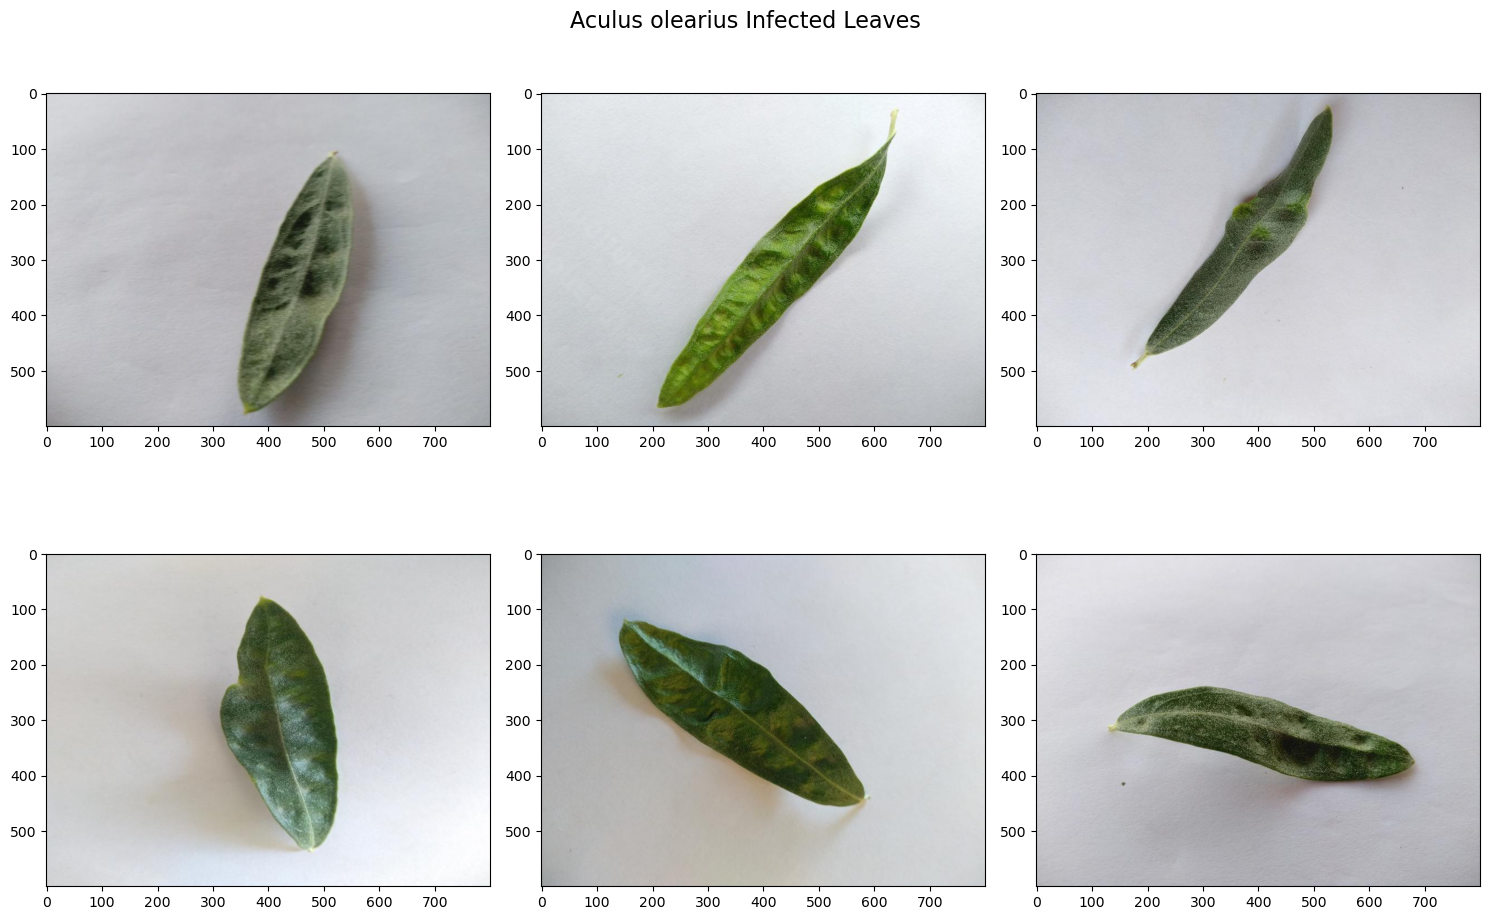

In [34]:
# Select 6 random images from your directory
aculus_olearius_sample = np.random.choice(aculus_olearius_data, 6, replace=False)

# Set up a subplot grid that is 2x3
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, ax in enumerate(axs.flatten()):
    if i < len(aculus_olearius_sample):
        # Read the image
        img_path = os.path.join(dir, 'aculus_olearius', aculus_olearius_sample[i])
        image = Image.open(img_path)
        num = np.asarray(image)

        
        # Plot the image
        ax.imshow(image)

plt.tight_layout()
fig.suptitle("Aculus olearius Infected Leaves", fontsize=16)  # Set title for the entire figure

plt.show()

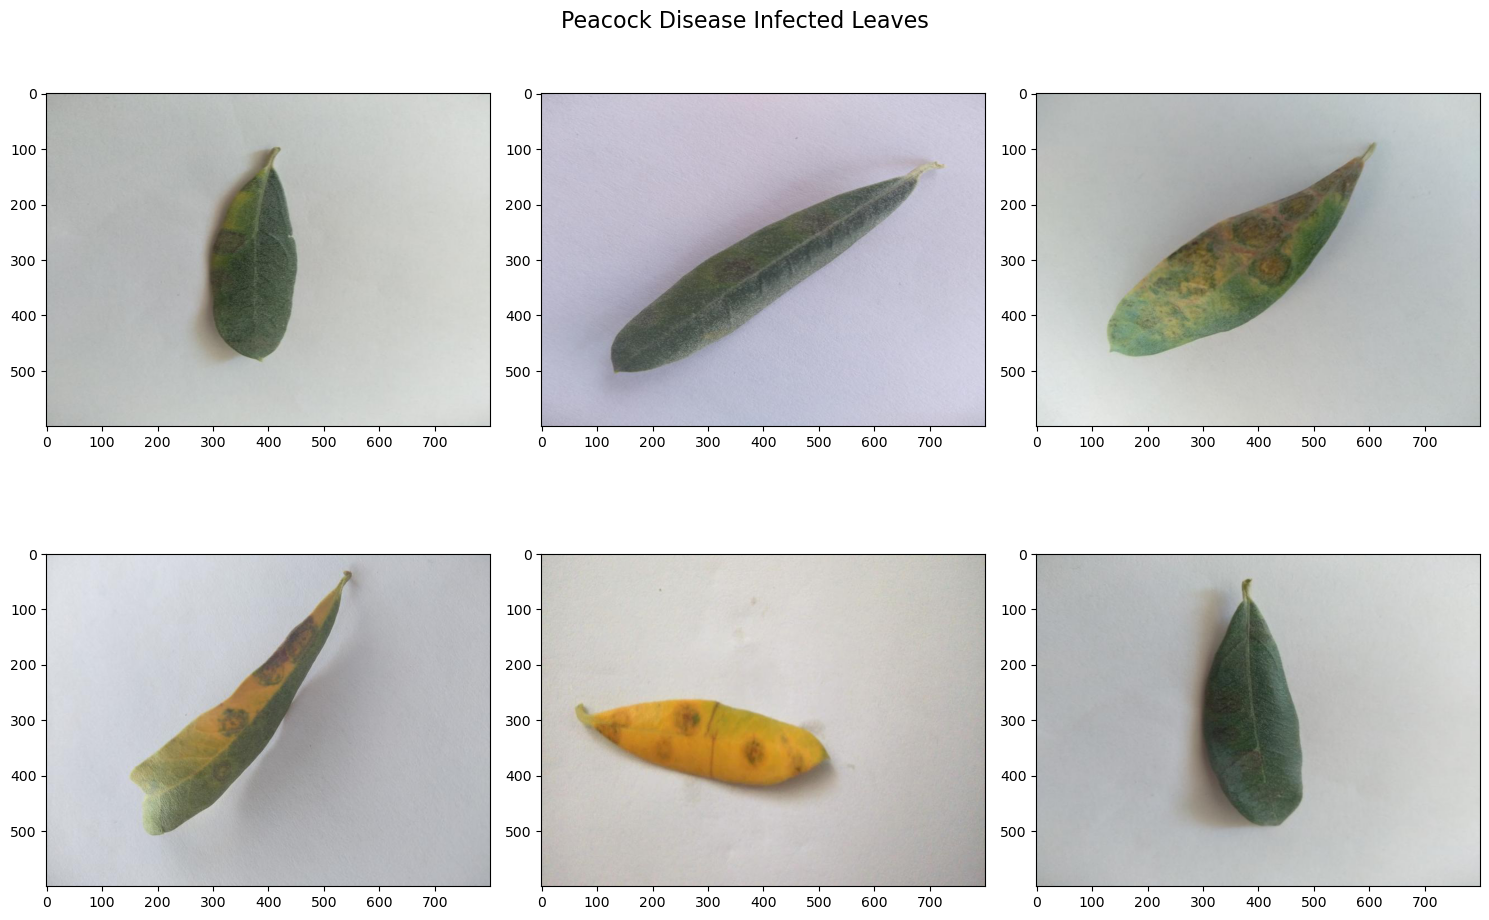

In [27]:
# Select 6 random images from your directory
peacock_disease_sample = np.random.choice(peacock_disease_data, 6, replace=False)

# Set up a subplot grid that is 2x3
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, ax in enumerate(axs.flatten()):
    if i < len(peacock_disease_sample):
        # Read the image
        img_path = os.path.join(dir, 'peacock_disease', peacock_disease_sample[i])
        image = Image.open(img_path)
        num = np.asarray(image)

        
        # Plot the image
        ax.imshow(image)

plt.tight_layout()
fig.suptitle("Peacock Disease Infected Leaves", fontsize=16)  # Set title for the entire figure

plt.show()

---

In [ ]:
EDA:

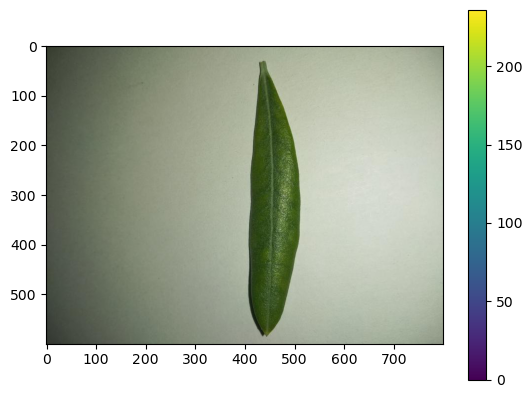

In [17]:
imim = mpimg.imread('/Users/raghadibrahim/Desktop/olive_data/Healthy/A163.jpg')
plt.imshow(imim)
plt.colorbar()

(array([1.0000e+01, 5.0000e+01, 1.8000e+02, 1.7500e+02, 1.3800e+02,
        1.3100e+02, 1.1000e+02, 1.2700e+02, 7.3200e+02, 1.7640e+03,
        3.3480e+03, 6.8360e+03, 6.8940e+03, 8.3840e+03, 1.1910e+04,
        1.1166e+04, 1.0908e+04, 1.2522e+04, 9.2400e+03, 8.8060e+03,
        9.9720e+03, 7.5130e+03, 8.2410e+03, 9.9370e+03, 7.6700e+03,
        7.6720e+03, 1.1074e+04, 9.9930e+03, 1.1015e+04, 1.4907e+04,
        1.1925e+04, 1.2642e+04, 1.6147e+04, 1.3403e+04, 1.2569e+04,
        1.7466e+04, 1.6074e+04, 1.8659e+04, 2.1445e+04, 1.6372e+04,
        1.4788e+04, 1.9278e+04, 1.9909e+04, 2.0323e+04, 3.0317e+04,
        2.1263e+04, 5.6550e+03, 3.3100e+02, 7.0000e+00, 2.0000e+00]),
 array([ 19.  ,  23.34,  27.68,  32.02,  36.36,  40.7 ,  45.04,  49.38,
         53.72,  58.06,  62.4 ,  66.74,  71.08,  75.42,  79.76,  84.1 ,
         88.44,  92.78,  97.12, 101.46, 105.8 , 110.14, 114.48, 118.82,
        123.16, 127.5 , 131.84, 136.18, 140.52, 144.86, 149.2 , 153.54,
        157.88, 162.22, 166.56

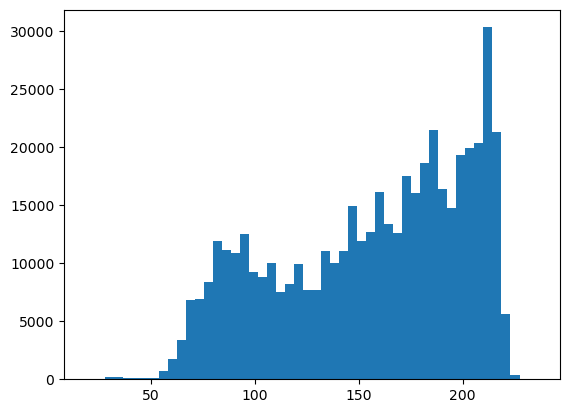

In [28]:
plt.hist(imim[:,:,1].ravel(), bins=50)

(array([   52.,   274.,  1906.,  3674.,  5061.,  6561.,  4315.,  4193.,
         2601.,  2239.,  2422.,  2154.,  3447.,  3437.,  4713.,  7253.,
         8579., 13129., 10461., 10554., 11983.,  9246., 10390.,  8957.,
        10820.,  7991.,  9451., 12417.,  9705.,  9809., 13699., 13002.,
        17784., 13307., 14816., 20412., 18029., 20562., 14674., 11860.,
        15799., 12570., 18113., 16409., 24854., 14617., 10652., 10157.,
          860.,    30.]),
 array([  0. ,   4.4,   8.8,  13.2,  17.6,  22. ,  26.4,  30.8,  35.2,
         39.6,  44. ,  48.4,  52.8,  57.2,  61.6,  66. ,  70.4,  74.8,
         79.2,  83.6,  88. ,  92.4,  96.8, 101.2, 105.6, 110. , 114.4,
        118.8, 123.2, 127.6, 132. , 136.4, 140.8, 145.2, 149.6, 154. ,
        158.4, 162.8, 167.2, 171.6, 176. , 180.4, 184.8, 189.2, 193.6,
        198. , 202.4, 206.8, 211.2, 215.6, 220. ]),
 <BarContainer object of 50 artists>)

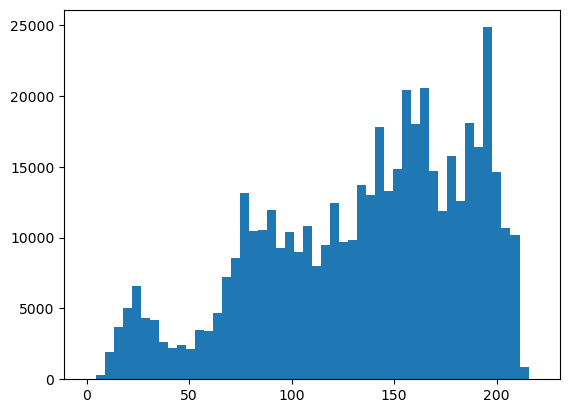

In [29]:
plt.hist(imim[:,:,2].ravel(), bins=50)

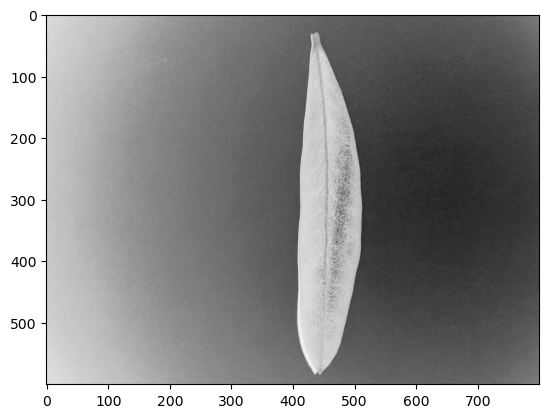

In [30]:
plt.imshow(imim[:,:,1], cmap = 'Greys', vmin=0, vmax=255)

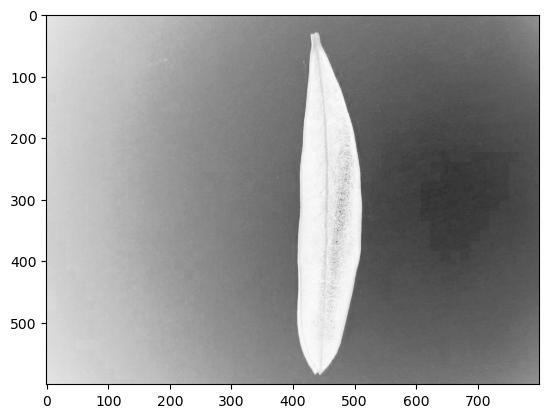

In [31]:
plt.imshow(imim[:,:,2], cmap = 'Greys', vmin=0, vmax=255)